#### 오차제곱합 실습
##### 오차제곱합의 수식의 결과값이 낮을 수록 정답에 가까울 확률이 높다는 것을 의미한다

In [72]:
import numpy as np

## y = 활성화 함수(소프트맥스)의 출력값
y = [ 0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0 ] # 정답이 2일 확률이 60%를 표현

## t = 원-핫 인코딩 표기법: 하나의 원소만 1이고 나머지는 0으로 나타내는 표기법
t = [ 0, 0, 1, 0, 0, 0, 0, 0, 0, 0 ] # 1원소가 2번 인덱스 이므로 정답이 2인것을 표현

def sum_squares_error (y, t):
    n = len(y)
    sum = 0

    for i in range(n):
        sum += np.sum( (y[i] - t[i]) ** 2 )

    return sum / n

sum_squares_error(np.array(y), np.array(t)) # -> 0.09750000000000003

y = [ 0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0 ] # 정답이 7일 확률이 60%를 표현
sum_squares_error(np.array(y), np.array(t)) # -> 0.5975

##### N개의 훈련 데이터를 오차제곱합의 수식 ######

0.11949999999999998

#### 교차 엔트로피 오차 실습
##### 오차제곰합과 마찬가지로 결과값이 작을수록 정답일 확률이 높아진다는 의미
##### 수식에는 없는 델타값은 더한 이유: np.log() 함수에 0을 입력하면 -inf(음의 무한대)가 되어 계산이 불가능해지기 때문에 아주 작은 값을 더해 음의 무한대 값을 피한다

In [73]:
def cross_entropy_error(y, t):
    n = len(y)
    sum = 0
    delta = 1e-7

    for i in range(n):
        sum += -np.sum( ( t * np.log(y + delta) ) )

    return sum / n

y = [ 0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0 ]
t = [ 0, 0, 1, 0, 0, 0, 0, 0, 0, 0 ]
cross_entropy_error(np.array(y), np.array(t)) ## -> 0.510825457099338

y = [ 0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0 ]
cross_entropy_error(np.array(y), np.array(t)) ## -> 2.302584092994546

2.3025840929945462

#### 해석적 미분

In [74]:
## 순간 변화량을 표현하는 해석적 미분
def numerical_diff(f, x):
    ## 미분 에서 lim을 표현하기 위해 0보다 큰 가장 작은 값을 넣는다
    ## 하지만, 이로 인해 계산의 결과에서 반올림 오차만큼의 오차가 발생하게 된다.
    ## 이를 개선하기 위해 10^(-4)의 값을 h로 할당한다
    h = 1e-4
    m = (f(x + h) - f(x - h)) /(2 * h)
    return m

def b_numerical_diff(f, x):
    h = 0.0001
    return ( f(x + h) - f(x) ) / ( 2 * h )

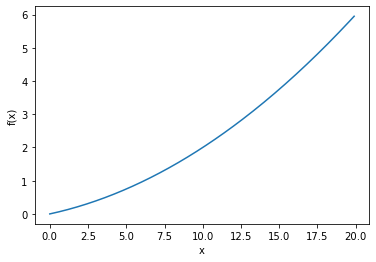

0.1999999999990898
0.2999999999986347


In [75]:
import numpy as np
import matplotlib.pylab as plt

def func_1(x):
    return 0.01 * x ** 2 + 0.1 * x

x = np.arange(0.0, 20.0, 0.1)
y = func_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

## retrun: x에 대한 f(x)의 변화량 -> 해석적 미분의 실제 기울기 값
print(numerical_diff(func_1, 5))

## return: x에 대한 f(x)의 변화량 -> 해석적 미분의 실제 기울기 값
print(numerical_diff(func_1, 10))

#### 편미분 실습

In [76]:
def func_2(x):
    return np.sum(x ** 2) ## x1^2 + x2^2

def func_tmp1(x0):
    return x0 * x0 + 4.0 ** 2.0

def numerical_gradient(f, x): ## 기울기 구하기
    h = 1e-4
    grad = np.zeros_like(x) ##

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val

    return grad


print(numerical_gradient(func_2, np.array([ 3.0, 4.0 ])))

print(numerical_gradient(func_2, np.array([ 0.0, 2.0 ])))

print(numerical_gradient(func_2, np.array([ 3.0, 0.0 ])))

[6. 8.]
[0. 4.]
[6. 0.]


/var/folders/yf/mmrj8c9d2zbfn3w8crhhf0_r0000gn/T/ipykernel_66245/139460668.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


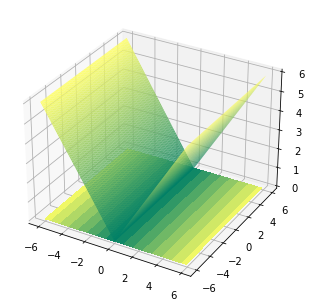

In [77]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = Axes3D(fig)

X = np.arange(-6, 6, 0.1)
Y = np.arange(-6, 6, 0.1)

X, Y = np.meshgrid(X, Y)

Z = np.sqrt(X ** 2, Y ** 2)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='summer')
ax.contourf(X, Y, Z, zdir='z', offset=0, cmap=plt.cm.summer)

plt.show()

#### 미니배치 학습 실습

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


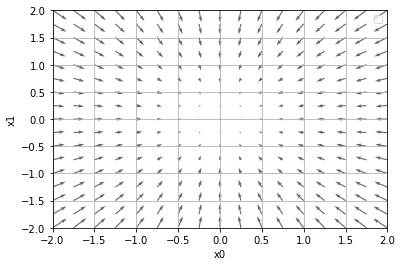

In [78]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

## 기울기 함수
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]

        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원

    return grad

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad

def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)

    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]) )

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()


0.1999999999990898


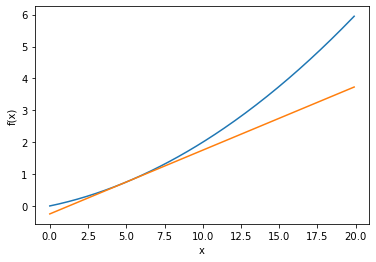

In [79]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

x = np.arange(0.0, 20.0, 0.1)
y = func_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(func_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()


#### 경사 하강법

In [80]:
## 경사 하강법 함수
def gradien_decent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x) ## 기울기 함수
        x -= lr * grad ## 매계변수 - ( 학습률 * 기울기 )

    return x, np.array(x_history)

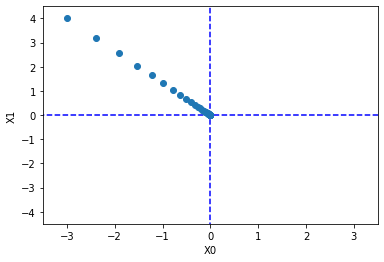

In [81]:
import numpy as np
## 경사법으로 f = x1^2 + x2^2의 최솟값을 구해라
def func_2(x): ## x = [ x1, x2 ]
    return x[0]**2 + x[1]**2

init_x = np.array([ -3.0, 4.0 ])
x, x_history = gradien_decent(func_2, init_x, lr = 0.1)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

#### 신경망에서의 기울기 구하기

In [82]:
import sys, os
sys.path.append(os.pardir)
import numpy as np

## 활성화 함수
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

## 손실 함수
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

## 기울기 함수
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val # 값 복원
        it.iternext()

    return grad

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3) ## 정규분포 초기화 -> 랜덤 행렬

    ## 입력된 x와 랜덤으로 생성된 가중치 행렬과의 곱으로 y값을 내보낸다
    def predict(self, x):
        return np.dot(x, self.W)

    ## 손실 함수 ( 교차 엔트로피 오차 )
    def loss(self, x, t):
        z = self.predict(x) ## 입력신호 * 가중치
        y = softmax(z) ## 활성화 함수를 통과한 확률 배열이 나온다
        loss = cross_entropy_error(y, t) ## 손실 함수 통과
        return loss ## 손실 함수의 결과값

In [83]:
## 신경망 생성
net = simpleNet()
print(net.W)

X = np.array([ 0.6, 0.9 ])
p = net.predict(X) ## 랜덤으로 생성된 가중치와의 곱으로 생성된 y값 행렬
print(p)

max = np.argmax(p) ## 결과 배열 중 최대값 요소의 인덱스 출력
print(max)

t = np.array([ 0, 0, 1 ]) ## 정답 레이블 생성
net.loss(p, t) ## 손실 함수 통과 -> 0.928 ~

[[ 1.99229671 -0.49287783  1.48909189]
 [ 0.38994634  1.18146984  1.58964115]]
[1.54632974 0.76759615 2.32413217]
2


ValueError: shapes (3,) and (2,3) not aligned: 3 (dim 0) != 2 (dim 0)

In [ ]:
# def f(W):
#     return net.loss(x, t)
f = lambda w: net.loss(x, t) ## 간단한 표현식

dW = numerical_gradient(f, net.W)
print(dW)
## 해당 가중치 매개변수를 줄이기 위해서는 해당 기울기가 양수이면 음의 방향으로, 음수이면 양의 방향으로 이동해야함을 알 수 있다.

#### 학습 알고리즘 구현 실습
- 1단계: 미니 배치
- 2단계: 기울기 산출
- 3단계: 매개변수 갱신
- 4단계: 1 ~ 3단계 반복

In [85]:
### 2층 신경망 생성
# from common.functions import *
# from common.gradient import numerical_gradient
import numpy as np

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        self.params = {}

        self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size) ## 인풋 행렬, 히든 행렬 사이즈 중간의 가중치 행렬 생성
        self.params["b1"] = np.zeros(hidden_size) ## 은닉층 편향 행렬 생성

        self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size) ## 은닉층 행렬, 출력층 행렬 중간 사이즈 행렬 생성
        self.params["b2"] = np.zeros(output_size) ## 출력층 편향 행렬 생성

    def predict(self, x):
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y

    def loss(self, x, t):
        ## x = 입력 데이터
        ## t = 정답 레이블
        y = self.predict(x) ## 입력 데이터와 가중치 행렬의 결과값
        return cross_entropy_error(y, t) ## 소프트맥스 함수의 출력값과 정답 레이블을 손실 함수를 통과 시킨다

    ## 정확성
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1) ## y의 각 row에서 최대값을 갖는 인덱스 리턴
        t = np.argmax(t, axis=1) ## t의 각 row에서 최대값을 갖는 인덱스 리턴

        ### 각 row의 최대값 인덱스가 같은 개수 / 전체 row 개수 = 정확성
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    ## 기울기
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads["W1"] = numerical_gradient(loss_W, self.params["W1"])
        grads["b1"] = numerical_gradient(loss_W, self.params["b1"])
        grads["W2"] = numerical_gradient(loss_W, self.params["W2"])
        grads["b2"] = numerical_gradient(loss_W, self.params["b2"])

        return grads

#### 신경망 학습 구현 실습

In [87]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

## 하이퍼 파라미터
iters_num = 10000 ## 반복 횟수
train_size = x_train.shape[0] ## row
batch_size = 100 # 미니 배치 크기
learning_rate = 0.1 ## 학습률

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    ## 기울기
    grad = network.numerical_gradient(x_batch, t_batch)

    ## 매개변수 갱싱
    for key in ("W1", "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grad[key]

    ## 손실함수 그래프 저장용
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

ModuleNotFoundError: No module named 'dataset'